## Beam Mapping notebook

This notebook is to select the spectrometer and pointing data and pot the beam measurements.


Pointers: 

Date of Observations: 2026-01-16

Beam scans started at 13:10 ET, ended at 13:51 ET 

Scan numbers: From 19 to 23 --> Dec map; From 27 to 41 --> AZ map 

To select the time in spec file (/GBTOBS_2026-01-16T112750.hdf5) use time index 60000 to EOF 

Cal file based on lab calibration: cal_file_2025_11_16.hdf5



In [1]:
from skymap import io, Calibrator, plot_utils
import numpy as np 
import matplotlib.pyplot as plt
import h5py
from pathlib import Path

import astropy.units as u


In [ ]:


datadir : Path = "/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01"

cal_file = datadir + "/310" + "/cal_file_2025_11_16.hdf5"

data_file = datadir + "/310" + "/GBTOBS_2026-01-16T112750.hdf5"

pointing_dir = datadir + "/ANTENNA/"

beam_slice = slice(60000,None)

scan_number = np.arange(19,41)
#scan_number = np.arange(19,23) and np.arange(27,41)

obs_data = io.read_obs_hdf5(data_file)
cal_data = io.read_cal_hdf5(cal_file)

print(f" Calibration File loaded: {cal_file}")
print(f" Data File loaded: {data_file}")


/Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/cal_file_2025_11_16.hdf5
 Calibration File loaded: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/cal_file_2025_11_16.hdf5
 Data File loaded: /Users/akshatha.vydula/packages_310/skymap/data_310/TGBT25B_614_01/310/GBTOBS_2026-01-16T112750.hdf5


In [ ]:
with h5py.File(data_file, 'r') as f:
    dset = f['data']['spec']
    print(list(f['data'].keys()), f['diag'], f['hdr'])
    print("shape:", dset.shape)
    print("dtype:", dset.dtype)
    print("chunks:", dset.chunks)
    print("compression:", dset.compression)

(86400, 10, 256)


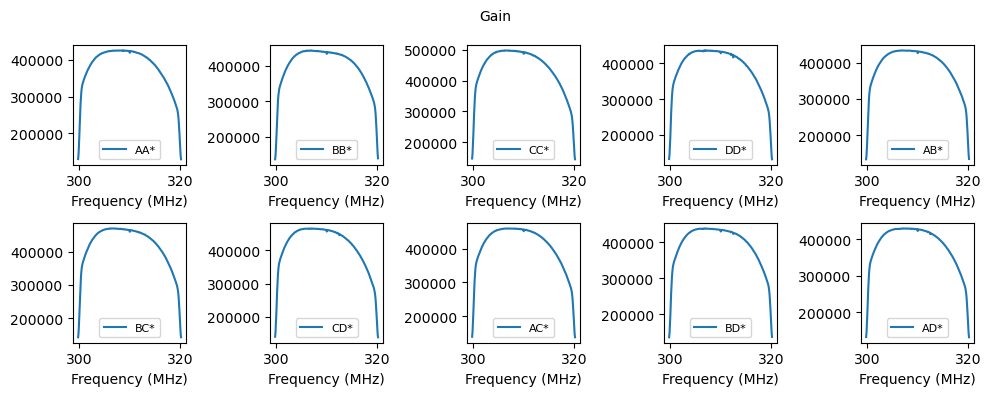

In [4]:
plot_utils.plot_cal_data(cal_data)

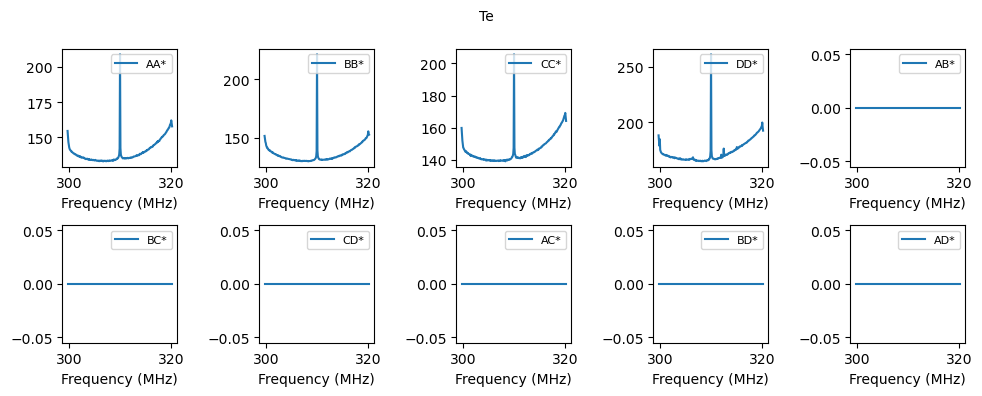

In [5]:
plot_utils.plot_cal_data(cal_data, attribute='te')

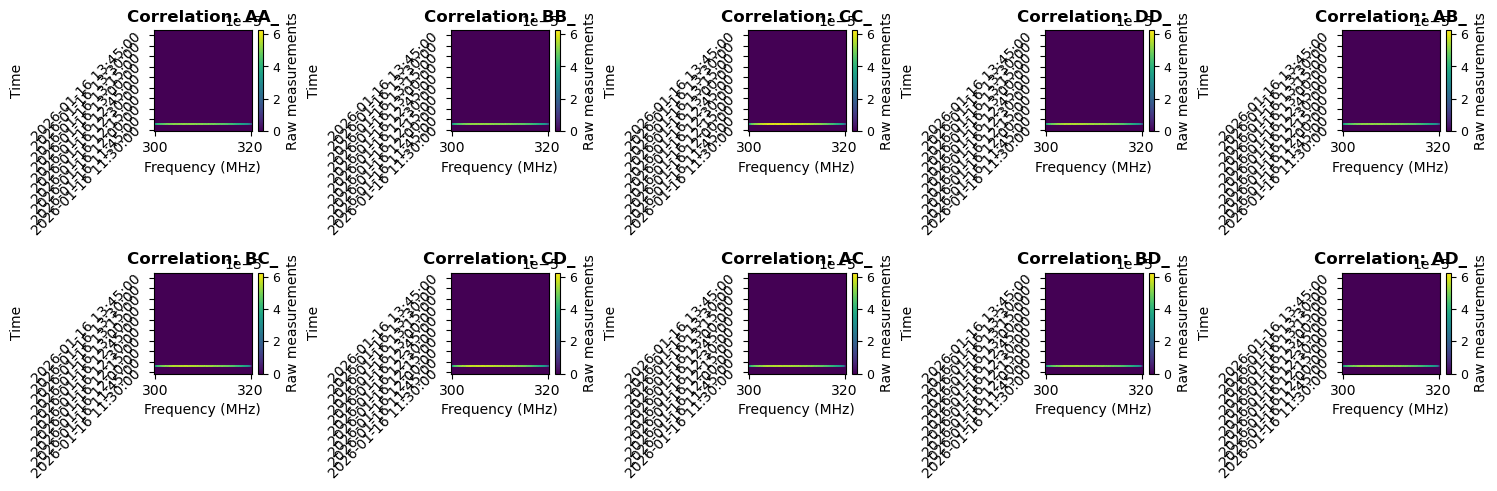

In [25]:
plot_utils.plot_waterwall(obs_data)

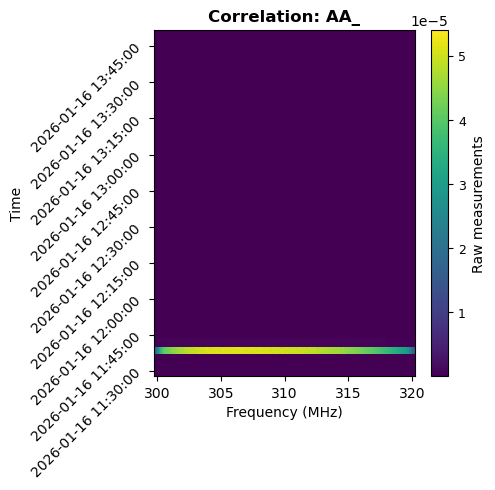

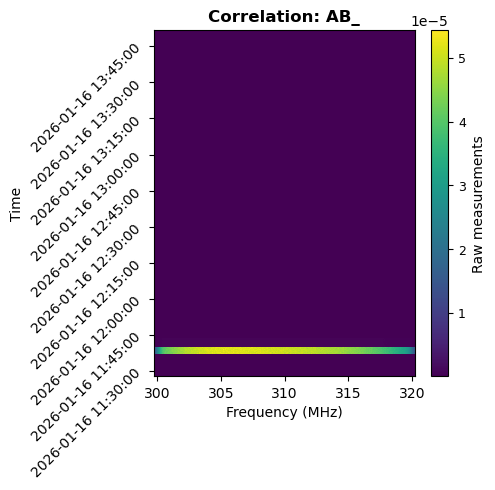

In [26]:
plot_utils.plot_waterwall(obs_data, data_type="magnitude", attribute="AA_");plot_utils.plot_waterwall(obs_data, data_type="magnitude", attribute="AB_")


In [8]:
spec_cal = Calibrator.lab_cal(obs_data, cal_data)

In [ ]:
#select the timr for beam scan
beam_slice = slice(60000,None)
beam_obs = io.get_slice_from_time(spec_cal, beam_slice)

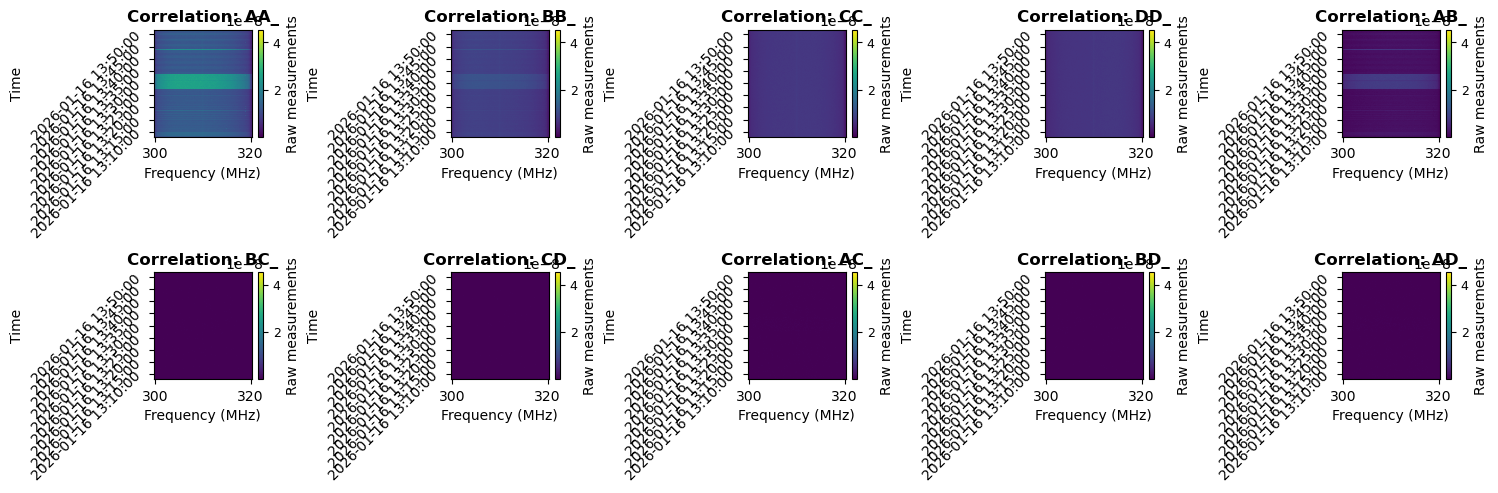

In [27]:
plot_utils.plot_waterwall(beam_obs, data_type="magnitude")

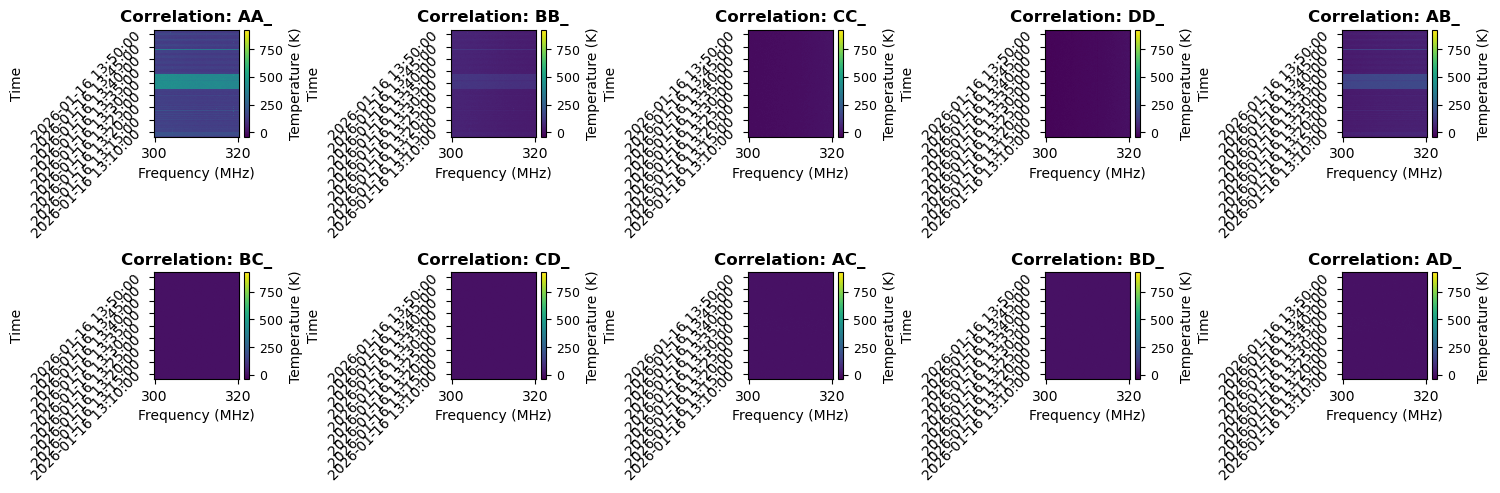

In [28]:
plot_utils.plot_waterwall(beam_obs, data_type="magnitude", calibrated=True)

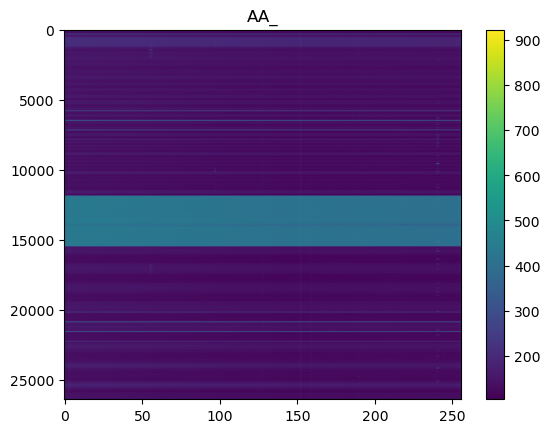

In [10]:
plt.imshow(np.abs(beam_obs.calibrated_spec.AA_).value, aspect='auto')
plt.colorbar()
plt.title("AA_")
plt.show()

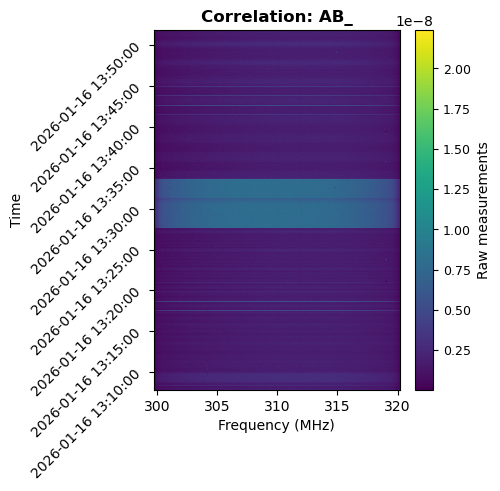

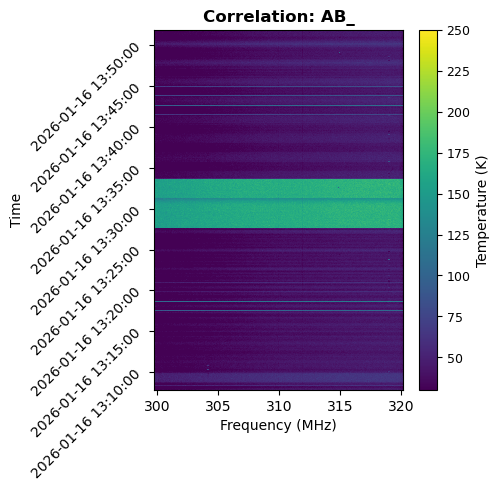

In [31]:
plot_utils.plot_waterwall(beam_obs, data_type="magnitude", attribute="AB_");
plot_utils.plot_waterwall(beam_obs, data_type="magnitude", attribute="AB_", calibrated=True, clim=(30, 250));

In [ ]:
io.get_pointing_data(datadir, date_of_observation, scan_number)

['freq', 'id', 'spec', 'time'] <HDF5 group "/diag" (9 members)> <HDF5 group "/hdr" (0 members)>
shape: (86400, 10, 256)
dtype: complex64
chunks: (64, 2, 32)
compression: None


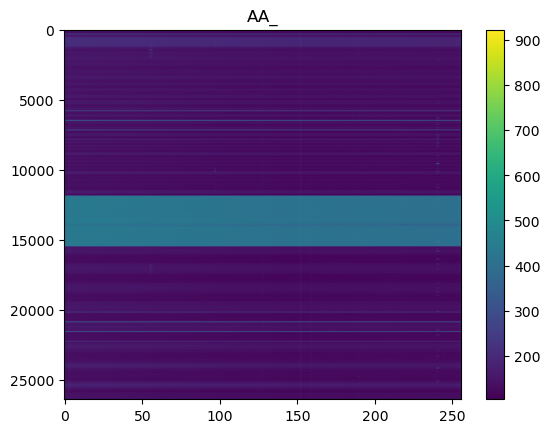

In [14]:
plt.imshow(Calibrator.get_Tsys_lab(test.spec.AA_*u.V**2, cal_data.gain.AA_).value.real - cal_data.te.AA_, aspect='auto')
plt.colorbar()
plt.title("AA_")
plt.show()

In [32]:
test.time

array([datetime.datetime(2026, 1, 16, 13, 7, 49, 726000),
       datetime.datetime(2026, 1, 16, 13, 7, 49, 826000),
       datetime.datetime(2026, 1, 16, 13, 7, 49, 925000), ...,
       datetime.datetime(2026, 1, 16, 13, 51, 49, 426000),
       datetime.datetime(2026, 1, 16, 13, 51, 49, 526000),
       datetime.datetime(2026, 1, 16, 13, 51, 49, 625000)],
      shape=(26400,), dtype=object)

In [19]:
const_bw= 20.48*10**6*u.Hz #Hz (bandwidth of the receiver)
const_rbw = const_bw/256 #Hz (resolution bandwidth)
print(const_rbw)

80000.0 Hz
